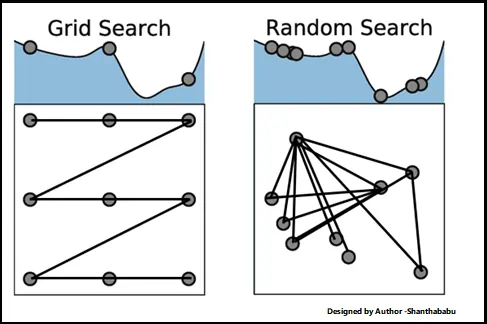

In [42]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [43]:
dataset = pd.read_csv(r"D:\polynomial data.csv")
dataset.head()

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000


In [44]:
dataset.dtypes

Level     int64
Salary    int64
dtype: object

In [45]:
x = dataset[['Level']] 
y = dataset['Salary']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [48]:
from sklearn.tree import DecisionTreeRegressor

## Before Tunning

In [49]:
dt = DecisionTreeRegressor ()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [50]:
dt.score(x_test,y_test)*100

99.13009863411138

In [51]:
dt.score(x_train,y_train)*100

100.0

In [52]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# GridSearchCV

In [53]:
df = {   "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
         "splitter":["best", "random"],
         "max_depth": [i for i in range(2, 20)],}

In [83]:
gd = GridSearchCV(DecisionTreeRegressor(),param_grid= df,)      # (cv=1,2,3,4,5) means how much time you want to tuning all the data again and again
gd.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [55]:
gd.best_params_

{'criterion': 'squared_error', 'max_depth': 12, 'splitter': 'best'}

In [56]:
gd.best_score_

0.9891966741969458

In [68]:
rd = RandomizedSearchCV(DecisionTreeRegressor(),param_distributions=df)      # also (cv=1,2,3,4,5) means how much time you want to tuning all the data again and again
rd.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [69]:
rd.best_params_

{'splitter': 'best', 'max_depth': 19, 'criterion': 'squared_error'}

In [70]:
rd.best_score_

0.9891966741969458

## After Tunning

In [59]:
dt = DecisionTreeRegressor(criterion="squared_error", max_depth=12, splitter="best")
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=12)

In [60]:
dt.score(x_test,y_test)*100

99.13009863324893

# RandomizedSearchCV

In [ ]:
df = {   "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
         "splitter":["best", "random"],
         "max_depth": [i for i in range(2, 20)],}

In [82]:
rd = RandomizedSearchCV(DecisionTreeRegressor(),param_distributions= df,n_iter=20) #(n_iter=20,30,40,50) means how much data you want to randomly selected
rd.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19],
                                        'splitter': ['best', 'random']})

In [79]:
rd.best_params_

{'splitter': 'best', 'max_depth': 19, 'criterion': 'friedman_mse'}

In [75]:
rd.best_score_

0.9891966741969458

## After Tunning

In [80]:
dt = DecisionTreeRegressor(splitter='best', max_depth=19, criterion='friedman_mse')
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=19)

In [81]:
dt.score(x_test,y_test)*100

99.13009863411138